In [1]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install -q yfinance

In [2]:
import pandas as panda
import numpy as nump

import matplotlib.pyplot as pylt
import seaborn as seans
seans.set_style('whitegrid')
pylt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
technicalList = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and starting times for data grab
technicalList = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

ending = datetime.now()
starting = datetime(ending.year - 1, ending.month, ending.day)

for stock in technicalList:
    globals()[stock] = yf.download(stock, starting, ending)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [4]:
# for company, company_name in zip(company_list, technicalList):
#     company["company_name"] = company_name

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
dataFrame = panda.concat(company_list, axis=0)
dataFrame.tail(10)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900,AMAZON
2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400,AMAZON
2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800,AMAZON
2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,AMAZON
2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50650100,AMAZON
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,AMAZON
2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700,AMAZON
2022-08-10,142.899994,144.600006,141.009995,142.690002,142.690002,54773800,AMAZON
2022-08-11,143.860001,144.490005,139.759995,140.639999,140.639999,44867300,AMAZON


In [6]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,157.072897,159.090992,155.275515,157.287500,156.756632,8.841172e+07
std,12.527472,12.574717,12.359800,12.467181,12.425277,2.641632e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,147.469997,149.089996,146.314995,147.907497,147.286118,6.947065e+07
50%,155.715004,157.934998,153.964996,156.730003,156.143616,8.325120e+07
75%,168.085003,170.312504,165.980003,167.464996,166.987362,1.008644e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.954327e+08


In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-13 to 2022-08-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
dataFrame.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [9]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

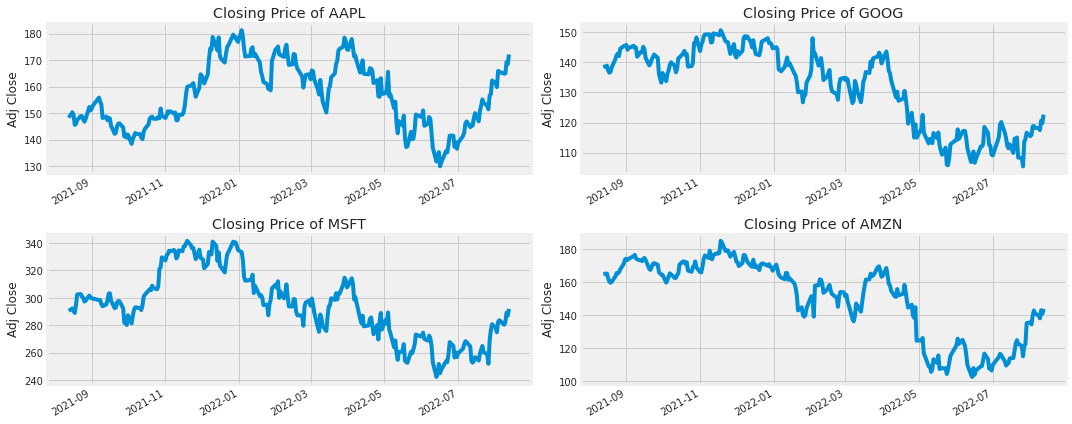

In [10]:
# Let's see a historical view of the closing price


pylt.figure(figsize=(15, 6))
pylt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    pylt.subplot(2, 2, i)
    company['Adj Close'].plot()
    pylt.ylabel('Adj Close')
    pylt.xlabel(None)
    pylt.title(f"Closing Price of {technicalList[i - 1]}")
    
pylt.tight_layout()

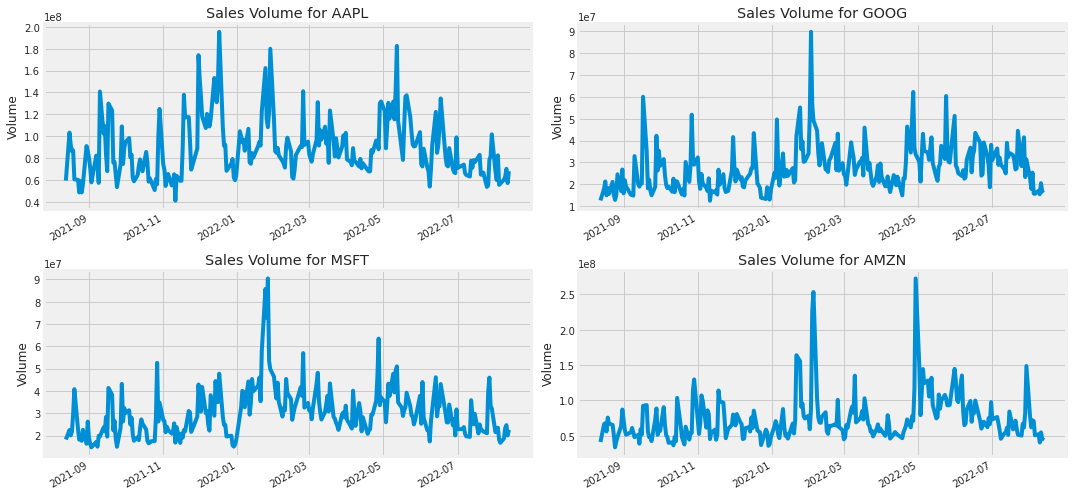

In [11]:
# Now let's plot the total volume of stock being traded each day
pylt.figure(figsize=(15, 7))
pylt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    pylt.subplot(2, 2, i)
    company['Volume'].plot()
    pylt.ylabel('Volume')
    pylt.xlabel(None)
    pylt.title(f"Sales Volume for {technicalList[i - 1]}")
    
pylt.tight_layout()

In [12]:
my_dayy = [10, 20, 50]

for ma in my_dayy:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [13]:
# print(GOOG.columns)

In [14]:
# dataFrame.groupby("company_name").hist(figsize=(12, 12));

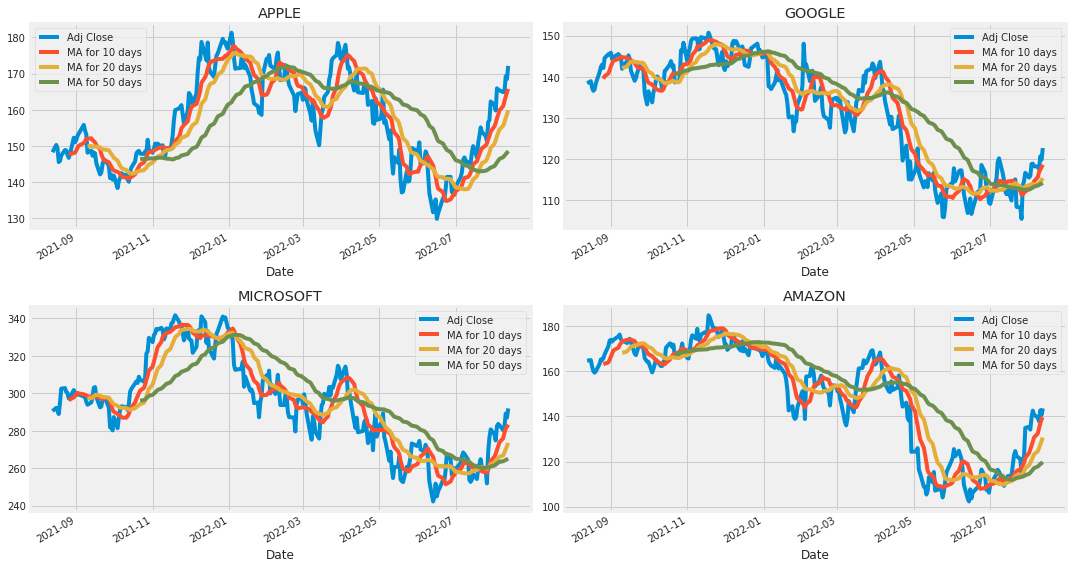

In [15]:
fig, axes = pylt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

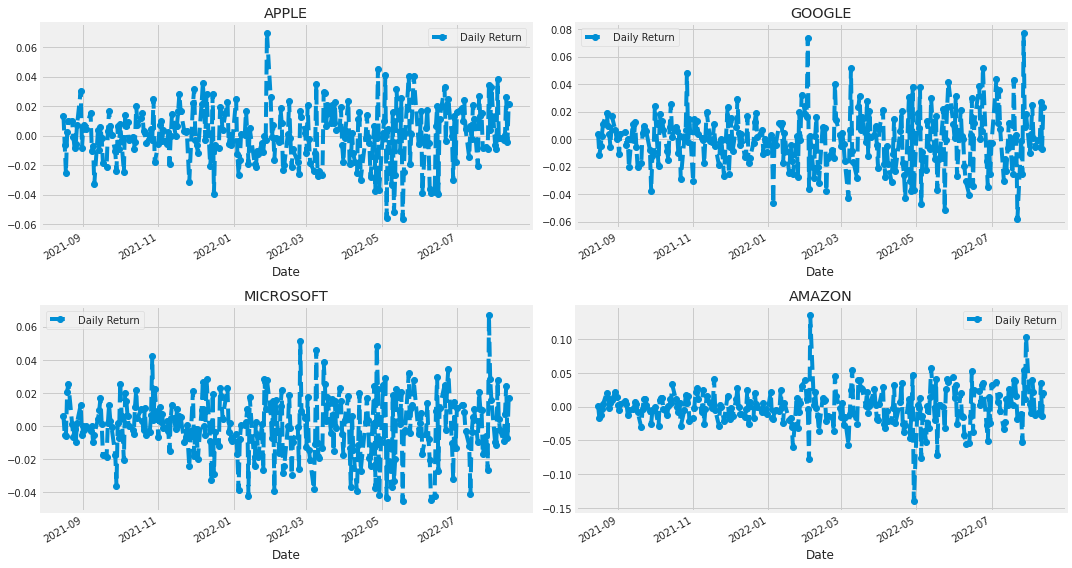

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = pylt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

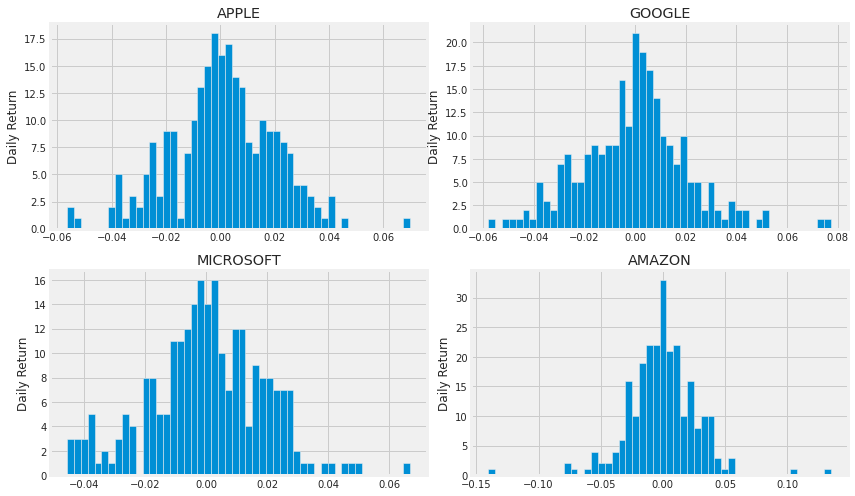

In [17]:
pylt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    pylt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    pylt.ylabel('Daily Return')
    pylt.title(f'{company_name[i - 1]}')
    
pylt.tight_layout()

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_dataFrame = DataReader(technicalList, 'yahoo', starting, ending)['Adj Close']

# Let's take a quick look
closing_dataFrame.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-13,148.269165,138.406006,290.478119,164.698502
2021-08-16,150.277908,138.916000,292.213928,164.949493
2021-08-17,149.353104,137.300507,290.706207,162.098007
2021-08-18,145.544434,136.570007,288.927338,160.061005
2021-08-19,145.882538,136.913498,294.929871,159.387497


In [19]:
# Make a new tech returns DataFrame
technicalRets = closing_dataFrame.pct_change()
technicalRets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-13,NaN,NaN,NaN,NaN
2021-08-16,0.013548,0.003685,0.005976,0.001524
2021-08-17,-0.006154,-0.011629,-0.005160,-0.017287
2021-08-18,-0.025501,-0.005320,-0.006119,-0.012566
2021-08-19,0.002323,0.002515,0.020775,-0.004208


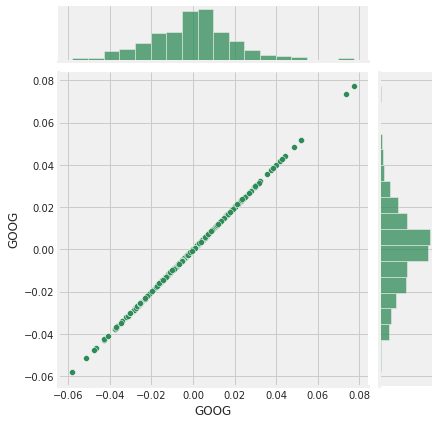

In [20]:
# Comparing Google to itself should show a perfectly linear relationship
seans.jointplot(x='GOOG', y='GOOG', data=technicalRets, kind='scatter', color='seagreen')

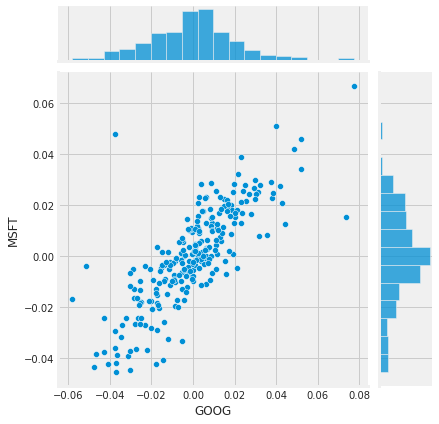

In [21]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
seans.jointplot(x='GOOG', y='MSFT', data=technicalRets, kind='scatter')

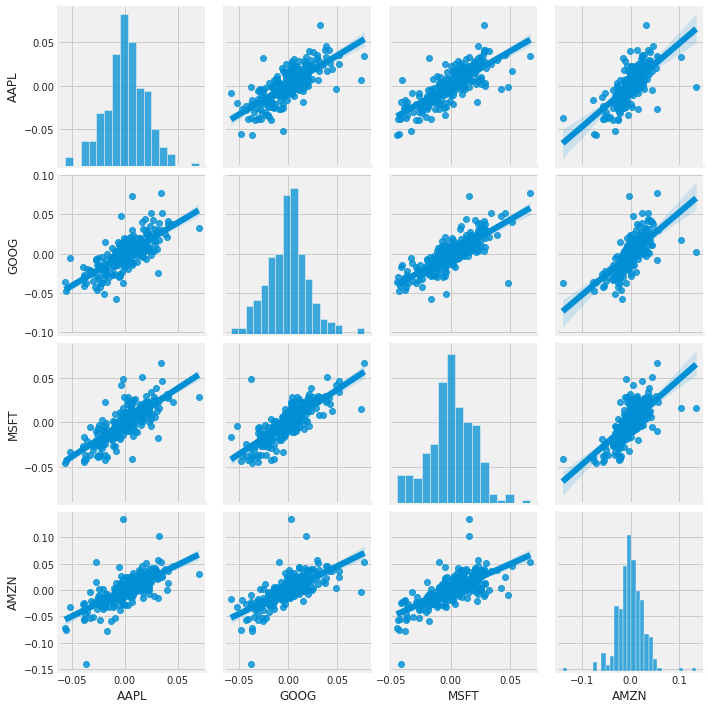

In [22]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

seans.pairplot(technicalRets, kind='reg')

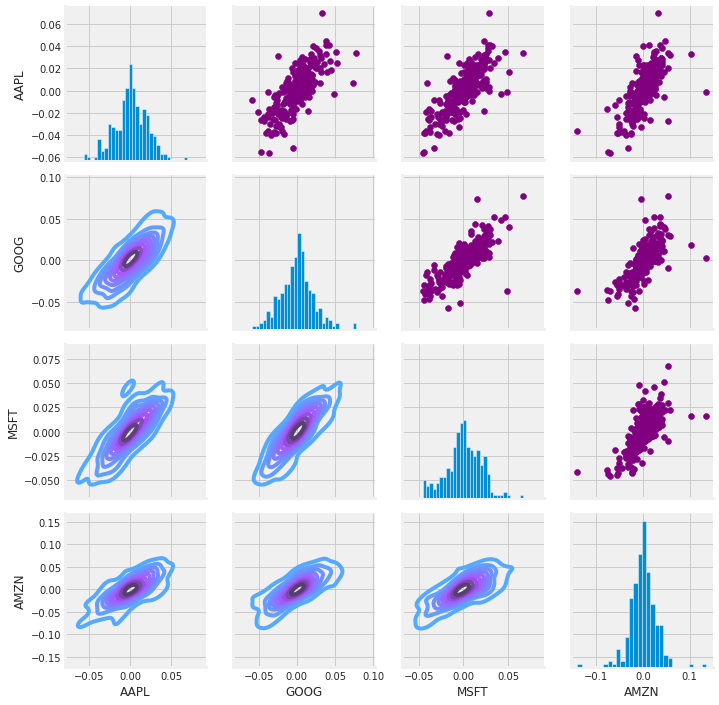

In [23]:
# Set up our figure by naming it returns_figure, call PairPLot on the DataFrame
return_figure = seans.PairGrid(technicalRets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_figure.map_upper(pylt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_figure.map_lower(seans.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_figure.map_diag(pylt.hist, bins=30)

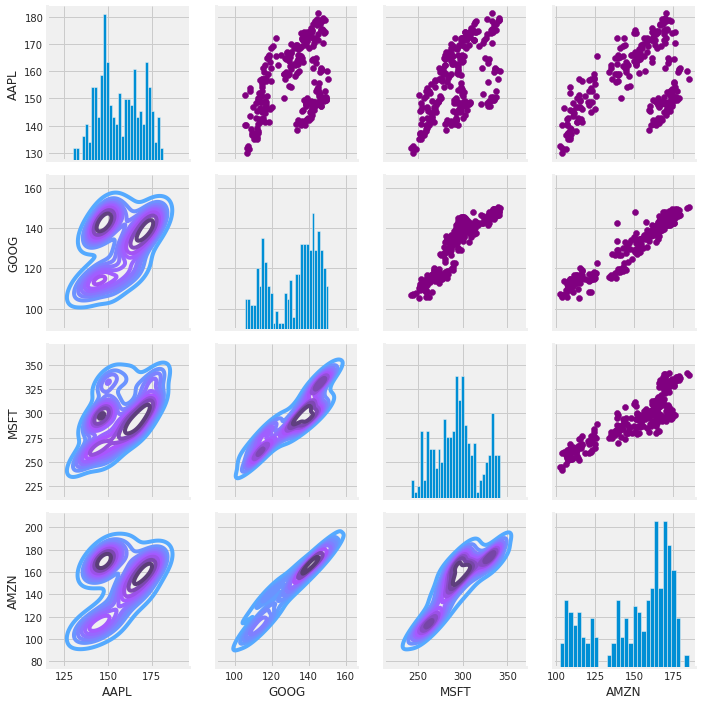

In [24]:
# Set up our figure by naming it returns_figure, call PairPLot on the DataFrame
returns_figure = seans.PairGrid(closing_dataFrame)

# Using map_upper we can specify what the upper triangle will look like.
returns_figure.map_upper(pylt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_figure.map_lower(seans.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_figure.map_diag(pylt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

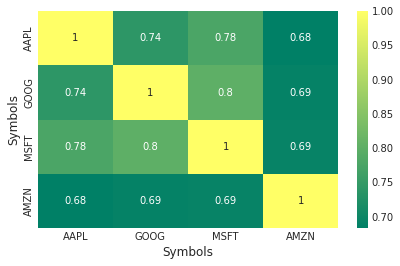

In [25]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
seans.heatmap(technicalRets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

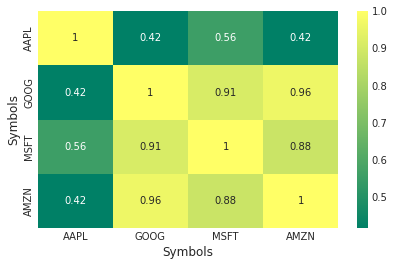

In [26]:
seans.heatmap(closing_dataFrame.corr(), annot=True, cmap='summer')

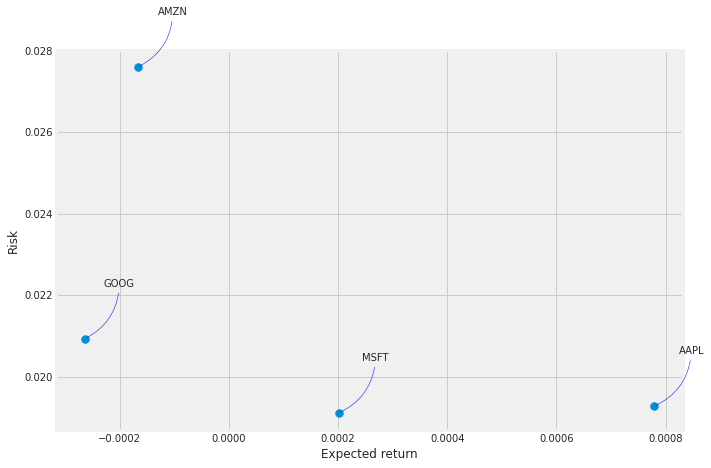

In [27]:
# Let's starting by defining a new DataFrame as a clenaed version of the oriignal technicalRets DataFrame
rets = technicalRets.dropna()

area = nump.pi * 20

pylt.figure(figsize=(10, 7))
pylt.scatter(rets.mean(), rets.std(), s=area)
pylt.xlabel('Expected return')
pylt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pylt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [28]:
# Get the stock quote
dataFrame = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
dataFrame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540044
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747408
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860232
...,...,...,...,...,...,...
2022-08-08,167.809998,164.199997,166.369995,164.869995,60276900.0,164.869995
2022-08-09,165.820007,163.250000,164.020004,164.919998,63135500.0,164.919998
2022-08-10,169.339996,166.899994,167.679993,169.240005,70170500.0,169.240005


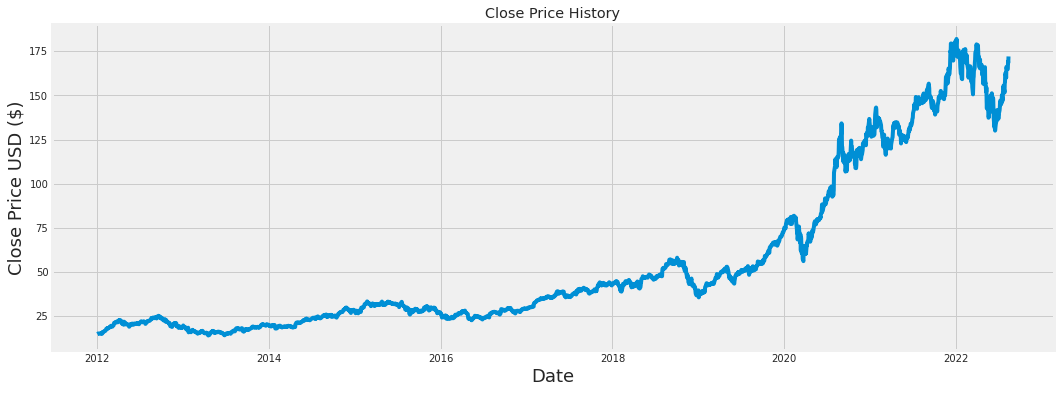

In [29]:
pylt.figure(figsize=(16,6))
pylt.title('Close Price History')
pylt.plot(dataFrame['Close'])
pylt.xlabel('Date', fontsize=18)
pylt.ylabel('Close Price USD ($)', fontsize=18)
pylt.show()

In [30]:
# Create a new dataframe with only the 'Close column 
data = dataFrame.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(nump.ceil( len(dataset) * .95 ))

training_data_len

2538

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.92401643],
       [0.9195538 ],
       [0.94103391]])

In [32]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = nump.array(x_train), nump.array(y_train)

# Reshape the data
x_train = nump.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-08-13 17:30:37.554719: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-13 17:30:38.077447: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2478/2478 [==============================] - 87s 34ms/step - loss: 0.0011


In [34]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
testing_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_testing = []
y_testing = dataset[training_data_len:, :]
for i in range(60, len(testing_data)):
    x_testing.append(testing_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_testing = nump.array(x_testing)

# Reshape the data
x_testing = nump.reshape(x_testing, (x_testing.shape[0], x_testing.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_testing)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = nump.sqrt(nump.mean(((predictions - y_testing) ** 2)))
rmse

6.9314764731524985

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


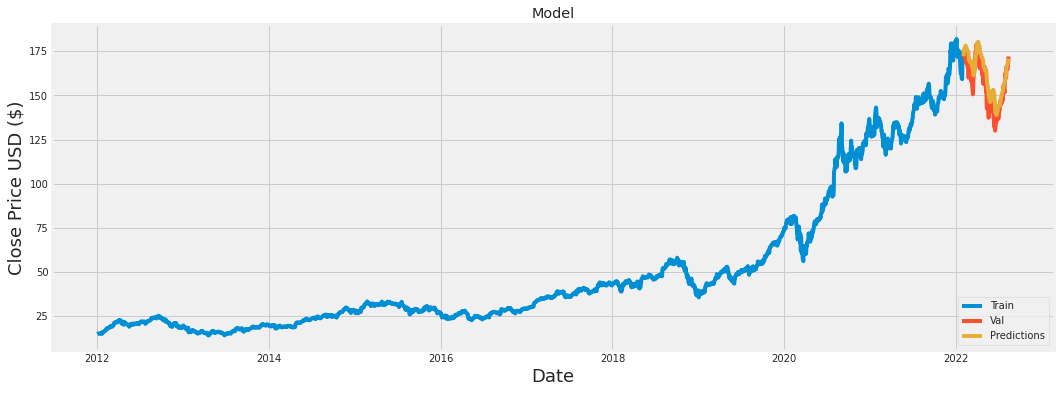

In [35]:
# Plot the data
trained = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
# Visualize the data
pylt.figure(figsize=(16,6))
pylt.title('Model')
pylt.xlabel('Date', fontsize=18)
pylt.ylabel('Close Price USD ($)', fontsize=18)
pylt.plot(trained['Close'])
pylt.plot(validation[['Close', 'Predictions']])
pylt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
pylt.show()

In [36]:
# Show the valid and predicted prices
validation

,Close,Predictions
Date,,
2022-02-02,175.839996,172.234634
2022-02-03,172.899994,174.671631
2022-02-04,172.389999,176.153229
2022-02-07,171.660004,176.915192
2022-02-08,174.830002,177.111084
...,...,...
2022-08-08,164.869995,167.898026
2022-08-09,164.919998,168.639709
2022-08-10,169.240005,169.086990
